In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import io
from google.colab import drive

#LOADING DATASET

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive"

'12th admit card .pdf'
'12th markshert.pdf'
 1671086833.pdf
 1671089089.pdf
 1689935924.gdoc
 202307271530236602PINdigital.pdf
 202307271530238489PWDdigital.pdf
'2nd sem timetable.jpg'
 881059149744115_signed.pdf
'aftermath and safety measures'
 AppDrive
 Classroom
'Colab Notebooks'
'Contact Information.gform'
'Contact Information (Responses).gsheet'
'Copy of CS229 Winter 2023-24 Logistics + FAQs.docx'
 DATASETS
 DriveApp
' FIITJEE'
 GDToT
'IMG_20240113_161437 (1).jpg'
 IMG_20240113_161437.jpg
 IMG-20240415-WA0031.jpg
 IMG-20240415-WA0032.jpg
 IMG-20240415-WA0033.jpg
 IMG-20240415-WA0034.jpg
 IMG-20240415-WA0035.jpg
 IMG-20240415-WA0036.jpg
 IMG-20240415-WA0037.jpg
 IMG-20240417-WA0002.jpg
 IMG-20240417-WA0009.jpg
 mobile_cleaned-1551253091700.csv
 NDA
'PAYMENT .jpg'
'Requirement List.gsheet'
 S01
 S02.1
 S02.2
 S03
 S04
 S05
 S06
'Sample file (1).txt'
'Sample file (2).txt'
'Sample file (3).txt'
'Sample file (4).txt'
'Sample file.txt'
 Screenshot_2024_0220_121107.jpg
 SnakeGame.py.gdoc

In [4]:
data1 = "./gdrive/My Drive/DATASETS/train1.csv"
print(data1)
data2 = "./gdrive/My Drive/DATASETS/test1.csv"
print(data2)

./gdrive/My Drive/DATASETS/train1.csv
./gdrive/My Drive/DATASETS/test1.csv


In [5]:
train = pd.read_csv(data1)
test = pd.read_csv(data2)

In [6]:
print(train)

     PhoneId Also Known As  Applications Architecture Aspect Ratio  \
0          0           NaN           NaN       64 bit         19:9   
1          1           NaN  Oppo Browser       64 bit         19:9   
2          2           NaN           NaN       64 bit       19.5:9   
3          4           NaN           NaN       64 bit       18.5:9   
4          5           NaN           NaN       64 bit       19.5:9   
..       ...           ...           ...          ...          ...   
350      465           NaN           NaN       64 bit          NaN   
351      466           NaN           NaN       64 bit          NaN   
352      468           NaN           NaN       64 bit          NaN   
353      470           NaN    Google Duo          NaN          NaN   
354      472           NaN           NaN       64 bit          NaN   

                                        Audio Features  Audio Jack  \
0                                                  NaN      3.5 mm   
1                  

In [7]:
print(test)

     PhoneId Also Known As Applications Architecture Aspect Ratio  \
0          3           NaN          NaN       64 bit         19:9   
1         11           NaN          NaN       64 bit         19:9   
2         13           NaN          NaN       64 bit       19.5:9   
3         16           NaN          NaN       64 bit       19.5:9   
4         19           NaN          NaN       64 bit         18:9   
..       ...           ...          ...          ...          ...   
114      464           NaN          NaN       64 bit          NaN   
115      467           NaN          NaN       64 bit       18.5:9   
116      469           NaN          NaN       64 bit          NaN   
117      471           NaN          NaN       64 bit          NaN   
118      473           NaN          NaN       64 bit          NaN   

    Audio Features Audio Jack                  Autofocus Bezel-less display  \
0              NaN     3.5 mm  Phase Detection autofocus                yes   
1            

In [8]:
print("number of data points in train: ", train.shape[0])
print("number of features in train: ", train.shape[1])
print("number of data points in test: ", test.shape[0])
print("number of features in test: ", test.shape[1])

number of data points in train:  355
number of features in train:  99
number of data points in test:  119
number of features in test:  98


In [9]:
train.describe()

,PhoneId,Rating Count,Review Count,Rating
count,355.000000,3.550000e+02,355.000000,355.000000
mean,235.267606,3.344979e+04,6648.228169,4.071549
std,137.204594,1.151661e+05,18943.317868,0.372663
min,0.000000,1.000000e+00,1.000000,2.500000
25%,113.500000,6.585000e+02,228.000000,3.900000
50%,234.000000,3.744000e+03,951.000000,4.100000
75%,358.000000,1.613650e+04,4208.500000,4.300000
max,472.000000,1.268083e+06,218020.000000,5.000000


In [10]:
train.head()

,PhoneId,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,...,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,NaN,4.5
1,1,NaN,Oppo Browser,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.5
2,2,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,yes,yes,v4.2,...,NaN,NaN,yes,NaN,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,NaN,4.4
3,4,NaN,NaN,64 bit,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,NaN,4.3
4,5,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 60 fps,NaN,yes,NaN,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,NaN,4.4


In [11]:
train.dtypes.value_counts()

object     95
int64       3
float64     1
Name: count, dtype: int64

In [12]:
train.dtypes == "object"

PhoneId              False
Also Known As         True
Applications          True
Architecture          True
Aspect Ratio          True
                     ...  
Wi-Fi                 True
Wi-Fi Features        True
Width                 True
Wireless Charging     True
Rating               False
Length: 99, dtype: bool

In [13]:
num_vars=train.columns[train.dtypes!='object']
cat_vars=train.columns[train.dtypes=='object']

In [14]:
print(num_vars)

Index(['PhoneId', 'Rating Count', 'Review Count', 'Rating'], dtype='object')


In [15]:
print(cat_vars)

Index(['Also Known As', 'Applications', 'Architecture', 'Aspect Ratio',
       'Audio Features', 'Audio Jack', 'Autofocus', 'Bezel-less display',
       'Bluetooth', 'Brand', 'Browser', 'Build Material', 'Camera Features',
       'Capacity', 'Chipset', 'Co-Processor', 'Colours', 'Custom UI',
       'Display Colour', 'Display Type', 'Email', 'Expandable Memory',
       'FM Radio', 'Fingerprint Sensor', 'Fingerprint Sensor Position',
       'Flash', 'GPS', 'Games', 'Graphics', 'HDMI', 'Heart Rate Monitor',
       'Height', 'IRIS Scanner', 'Image Resolution', 'Internal Memory', 'Java',
       'Launch Date', 'Loudspeaker', 'Mobile High-Definition Link(MHL)',
       'Model', 'Music', 'NFC', 'Network', 'Network Support',
       'Operating System', 'Optical Image Stabilisation', 'Other Facilities',
       'Other Sensors', 'Phone Book', 'Physical Aperture', 'Pixel Density',
       'Processor', 'Quick Charging', 'RAM', 'Resolution', 'Ring Tone',
       'Ruggedness', 'SAR Value', 'SIM 1', 'SIM 2

In [16]:
train[cat_vars].isnull()

,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,...,Video Player,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging
0,True,True,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
2,True,True,False,False,True,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,True
3,True,True,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,True,True,False,True,True,False,False,True,False,False,...,True,False,True,True,True,False,False,True,False,True
351,True,True,False,True,True,False,False,True,False,False,...,True,False,True,True,True,False,False,False,False,True
352,True,True,False,True,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
353,True,False,True,True,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True


#CLEANING DATASET

In [17]:
def data_clean(data):

    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner',
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    #Features having very low variance
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [18]:
train = data_clean(train)
test = data_clean(test)

In [19]:
train = train[(train.isnull().sum(axis=1) <= 15)]

In [20]:
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 47
Number of data points in test: 119
Number of features in test: 46


In [21]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass


def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

In [22]:
def data_clean_2(x):
    data = x.copy()

    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isna() == True] = "Other"

    return data

In [23]:
train = data_clean_2(train)
test = data_clean_2(test)

print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


<ipython-input-22-548f9f987731>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Flash'][data['Flash'].isna() == True] = "Other"
<ipython-input-22-548f9f987731>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"
<ipython-input-22-548f9f987731>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Num_cores'][data['Num_cores'].isna() == True] = "Other"
<

In [24]:
def data_clean_3(x):

    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [25]:
train = data_clean_3(train)
test = data_clean_3(test)

print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 18
Number of data points in test: 119
Number of features in test: 17


In [26]:
# one hot encoding

train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]

(460, 17)
Index(['PhoneId', 'Capacity', 'Screen to Body Ratio (calculated)',
       'Resolution', 'RAM', 'Weight', 'SIM Slot(s)', 'Sim1', 'os_name',
       'Brand', 'Pixel Density', 'Num_cores', 'Processor_frequency',
       'Screen Size', 'Internal Memory', 'SIM 2', 'Height'],
      dtype='object')
(460, 87)
Index(['PhoneId', 'Capacity', 'Screen to Body Ratio (calculated)',
       'Resolution', 'RAM', 'Weight', 'Pixel Density', 'Processor_frequency',
       'Screen Size', 'Internal Memory', 'Height',
       'SIM Slot(s)_Dual SIM, GSM+CDMA', 'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'Sim1_2G', 'Sim1_3G', 'Sim1_4G',
       'os_name_Android', 'os_name_Blackberry', 'os_name_KAI', 'os_name_Nokia',
       'os_name_Other', 'os_name_Tizen', 'os_name_iOS', 'Brand_10.or',
       'Brand_Apple', 'Brand_Asus', 'Brand_Billion', 'Brand_Blackberry',
       'Brand_Comio', 'Brand_Coolpad', 'Brand_Do', 'Brand_Gionee',
     

In [27]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [28]:
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])

print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 88
Number of data points in test: 119
Number of features in test: 87


In [29]:
train_new.shape
test_new.shape

(119, 87)

In [30]:
train_new.describe()

,PhoneId,Capacity,Screen to Body Ratio (calculated),Resolution,RAM,Weight,Pixel Density,Processor_frequency,Screen Size,Internal Memory,Height,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,3191.307918,72.353343,9.592375,11.120235,161.343109,344.211144,1.792551,5.462317,46.369501,149.946394,4.072434
std,137.231746,932.533527,9.357839,5.953827,61.320855,22.305556,88.161129,0.451598,0.742529,46.435453,9.192305,0.377066
min,0.000000,1020.000000,23.600000,2.000000,1.000000,58.000000,143.000000,1.000000,2.400000,0.000000,115.600000,2.500000
25%,110.000000,2900.000000,68.800000,5.000000,2.000000,150.000000,282.000000,1.400000,5.200000,16.000000,146.200000,3.900000
50%,229.000000,3055.000000,72.500000,8.000000,3.000000,161.000000,326.000000,1.800000,5.500000,32.000000,151.300000,4.100000
75%,354.000000,3750.000000,77.480000,13.000000,4.000000,172.000000,403.000000,2.200000,6.000000,64.000000,156.200000,4.300000
max,472.000000,13000.000000,87.660000,25.000000,512.000000,330.000000,576.000000,2.800000,6.590000,512.000000,174.100000,5.000000


In [31]:
train_new.head()

,PhoneId,Capacity,Screen to Body Ratio (calculated),Resolution,RAM,Weight,Pixel Density,Processor_frequency,Screen Size,Internal Memory,...,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
0,0,4000,80.68,20,4,182,403,1.8,6.26,64,...,False,True,False,False,False,False,False,True,False,4.5
1,1,4230,80.85,8,3,168,271,1.8,6.20,32,...,False,True,False,False,False,False,False,True,False,4.5
2,2,3500,83.68,25,3,168,409,2.1,6.30,32,...,False,True,False,False,False,False,False,True,False,4.4
3,4,3300,74.78,24,4,169,411,2.2,6.00,64,...,False,True,False,False,False,False,False,True,False,4.3
4,5,3750,84.23,16,4,175,396,2.2,6.50,64,...,False,True,False,False,False,False,False,True,False,4.4


In [32]:
test_new.describe()

,PhoneId,Capacity,Screen to Body Ratio (calculated),Resolution,RAM,Weight,Pixel Density,Processor_frequency,Screen Size,Internal Memory,Height
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,240.176471,3233.764706,71.955630,9.294118,11.983193,164.000000,334.731092,1.768403,5.463445,48.336134,150.277679
std,136.804614,772.097887,10.349265,5.618301,65.670335,16.698726,102.821278,0.471133,0.759304,49.842001,8.516004
min,3.000000,1020.000000,18.890000,2.000000,1.000000,105.000000,114.000000,1.100000,1.800000,0.000000,111.500000
25%,130.000000,3000.000000,68.835000,5.000000,2.000000,154.000000,269.500000,1.400000,5.100000,16.000000,146.550000
50%,245.000000,3050.000000,72.120000,8.000000,3.000000,164.000000,294.000000,1.770000,5.500000,32.000000,151.700000
75%,348.500000,3725.000000,77.220000,13.000000,4.000000,173.500000,402.000000,2.000000,5.995000,64.000000,155.900000
max,473.000000,5000.000000,85.430000,25.000000,512.000000,218.000000,745.000000,2.960000,6.500000,256.000000,173.800000


In [33]:
test_new.head()

,PhoneId,Capacity,Screen to Body Ratio (calculated),Resolution,RAM,Weight,Pixel Density,Processor_frequency,Screen Size,Internal Memory,...,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other
0,3,4230,80.85,5,2,168,271,1.8,6.20,16,...,False,False,True,False,False,False,False,False,True,False
1,11,5000,81.60,12,4,205,402,1.8,6.20,64,...,False,False,True,False,False,False,False,False,True,False
2,13,3500,83.84,25,6,169,409,2.0,6.30,64,...,False,False,True,False,False,False,False,False,True,False
3,16,3500,83.84,16,4,169,409,2.0,6.30,64,...,False,False,True,False,False,False,False,False,True,False
4,19,4000,77.43,20,4,181,403,1.8,5.99,64,...,False,False,True,False,False,False,False,False,True,False


In [34]:
train=train_new.copy()
test=test_new.copy()

#BINARIZATION AND VISUALISING DATA

In [35]:
import matplotlib.pyplot as plt

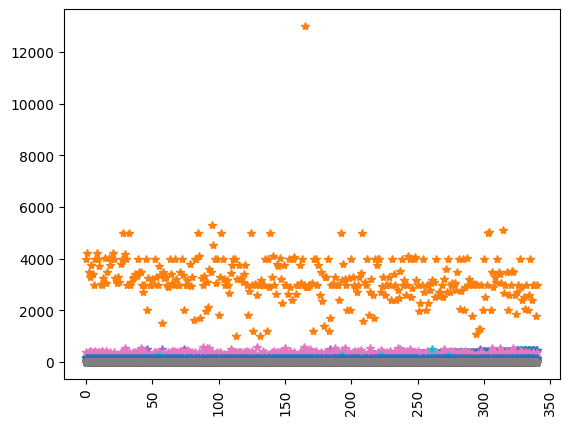

In [36]:
plt.plot(train,'*')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
binarized_train=train.apply(pd.cut,bins=2,labels=[0,1])

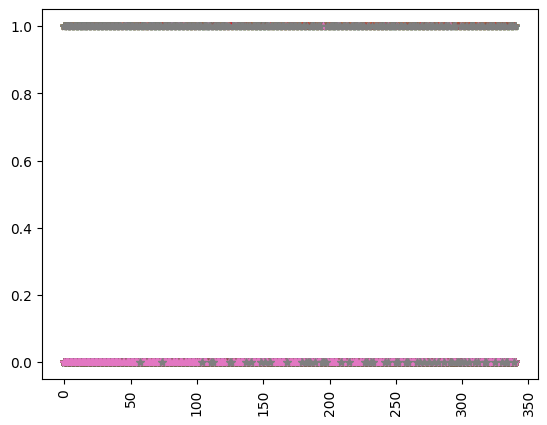

In [38]:
plt.plot(binarized_train,'*')
plt.xticks(rotation='vertical')
plt.show()

In [39]:
binarized_test=test.apply(pd.cut,bins=2,labels=[0,1])

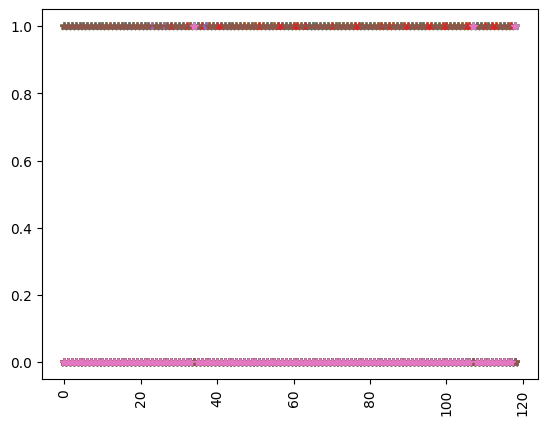

In [40]:
plt.plot(binarized_test,'*')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
x_train=binarized_train.drop("Rating",axis=1).values
y_train=binarized_train["Rating"].values
x_test=binarized_test.values


#MP Neuron Model

In [42]:
from random import randint
import numpy as np

In [43]:
print(x_train)

[[0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 1 0]]


In [44]:
print(x_test)

[[0 1 1 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 1]]


In [45]:
b=4
i = randint(0,x_train.shape[0])
print('for row ', i)
if(np.sum(x_train[100,:]) >= b):
  print('mp neuron inference is like')
else:
  print('mp neuron inference is dislike')

if(y_train[i]==1):
  print('ground reality is like')
else:
  print('ground reality is dislike')


for row  124
mp neuron inference is like
ground reality is like


In [46]:
b=3
Y_pred_train=[]
accurate_rows=0
for x,y in zip(x_train, y_train):
  y_pred=(np.sum(x)>=b)
  Y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)

print(accurate_rows, accurate_rows/x_train.shape[0])


283 0.8299120234604106


In [47]:
for b in range(x_train.shape[1] + 1):
  y_pred_train=[]
  accurate_rows=0

  for x,y in zip(x_train, y_train):
    y_pred=(np.sum(x)>=b)
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)

  print(b, accurate_rows/x_train.shape[0])

0 0.8299120234604106
1 0.8299120234604106
2 0.8299120234604106
3 0.8299120234604106
4 0.8299120234604106
5 0.8299120234604106
6 0.8299120234604106
7 0.8211143695014663
8 0.8181818181818182
9 0.8181818181818182
10 0.6686217008797654
11 0.5513196480938416
12 0.375366568914956
13 0.21114369501466276
14 0.17595307917888564
15 0.17008797653958943
16 0.17008797653958943
17 0.17008797653958943
18 0.17008797653958943
19 0.17008797653958943
20 0.17008797653958943
21 0.17008797653958943
22 0.17008797653958943
23 0.17008797653958943
24 0.17008797653958943
25 0.17008797653958943
26 0.17008797653958943
27 0.17008797653958943
28 0.17008797653958943
29 0.17008797653958943
30 0.17008797653958943
31 0.17008797653958943
32 0.17008797653958943
33 0.17008797653958943
34 0.17008797653958943
35 0.17008797653958943
36 0.17008797653958943
37 0.17008797653958943
38 0.17008797653958943
39 0.17008797653958943
40 0.17008797653958943
41 0.17008797653958943
42 0.17008797653958943
43 0.17008797653958943
44 0.1700879

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
class MPNeuron:

  def __init__(self):
    self.b = None

  def model(self,x):
    return(sum(x)>=self.b)

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    accuracy = {}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)

    best_b = max(accuracy, key=accuracy.get)
    self.b = best_b

    print('optimal value of b is',best_b)
    print('Highest accuracy is',accuracy[best_b])

In [50]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_train,y_train)

optimal value of b is 0
Highest accuracy is 0.8299120234604106


#TEST

In [53]:
y_pred = mp_neuron.predict(x_test)
mp_neuron.fit(x_test,y_pred)

optimal value of b is 0
Highest accuracy is 1.0
